In [3]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix
import pickle as pic
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.preprocessing import StandardScaler

In [65]:
df = pd.read_csv('Data.csv', names = ['TA', 'Course instructor', 'Course Categorical', 'Summer or regular semester', 'Class size', 'Class attribute'])

In [66]:
df.head()

,TA,Course instructor,Course Categorical,Summer or regular semester,Class size,Class attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   TA                          151 non-null    int64
 1   Course instructor           151 non-null    int64
 2   Course Categorical          151 non-null    int64
 3   Summer or regular semester  151 non-null    int64
 4   Class size                  151 non-null    int64
 5   Class attribute             151 non-null    int64
dtypes: int64(6)
memory usage: 7.2 KB


In [68]:
df.describe()

,TA,Course instructor,Course Categorical,Summer or regular semester,Class size,Class attribute
count,151.000000,151.000000,151.000000,151.000000,151.000000,151.000000
mean,1.807947,13.642384,8.105960,1.847682,27.867550,2.019868
std,0.395225,6.825779,7.023914,0.360525,12.893758,0.820327
min,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
25%,2.000000,8.000000,3.000000,2.000000,19.000000,1.000000
50%,2.000000,13.000000,4.000000,2.000000,27.000000,2.000000
75%,2.000000,20.000000,15.000000,2.000000,37.000000,3.000000
max,2.000000,25.000000,26.000000,2.000000,66.000000,3.000000


In [69]:
import copy 
nd = copy.deepcopy(df) 

In [70]:
type(nd)

pandas.core.frame.DataFrame

In [71]:
nd.head(10)

,TA,Course instructor,Course Categorical,Summer or regular semester,Class size,Class attribute
0,1,23,3,1,19,3
1,2,15,3,1,17,3
2,1,23,3,2,49,3
3,1,5,2,2,33,3
4,2,7,11,2,55,3
5,2,23,3,1,20,3
6,2,9,5,2,19,3
7,2,10,3,2,27,3
8,1,22,3,1,58,3
9,2,15,3,1,20,3


In [ ]:
nd.drop(["TA","Summer or regular semester"], axis  = 1, inplace = True)

In [75]:
nd.head()

,Course instructor,Course Categorical,Class size,Class attribute
0,23,3,19,3
1,15,3,17,3
2,23,3,49,3
3,5,2,33,3
4,7,11,55,3


In [76]:
q = [24, 5, 23]

In [79]:
d = [100, 45, 76]

In [73]:
a = nd.iloc[:, :3]
a  = nd.iloc[:,[0,1,2]].values

In [59]:
print(a)

[[23  3 19]
 [15  3 17]
 [23  3 49]
 [ 5  2 33]
 [ 7 11 55]
 [23  3 20]
 [ 9  5 19]
 [10  3 27]
 [22  3 58]
 [15  3 20]
 [10 22  9]
 [13  1 30]
 [18 21 29]
 [ 6 17 39]
 [ 6 17 42]
 [ 6 17 43]
 [ 7 11 10]
 [22  3 46]
 [13  3 10]
 [ 7 25 42]
 [25  7 27]
 [25  7 23]
 [ 2  9 31]
 [ 1 15 22]
 [15 13 37]
 [ 7 11 13]
 [ 8  3 24]
 [14 15 38]
 [21  2 42]
 [22  3 28]
 [11  1 51]
 [18  5 19]
 [13  1 31]
 [13  3 13]
 [ 5  2 37]
 [16  8 36]
 [ 4 16 21]
 [ 5  2 48]
 [14 15 38]
 [23  3 19]
 [15  3 17]
 [23  3 49]
 [ 5  2 33]
 [ 7 11 55]
 [23  3 20]
 [ 9  5 19]
 [10  3 27]
 [22  3 58]
 [15  3 20]
 [10 22  9]
 [13  1 30]
 [18 21 29]
 [ 6 17 39]
 [ 6 17 42]
 [ 6 17 43]
 [ 7 11 10]
 [22  3 46]
 [13  3 10]
 [ 7 25 42]
 [25  7 27]
 [25  7 23]
 [ 2  9 31]
 [ 1 15 22]
 [15 13 37]
 [ 7 11 13]
 [ 8  3 24]
 [14 15 38]
 [21  2 42]
 [22  3 28]
 [11  1 51]
 [18  5 19]
 [13  1 31]
 [13  3 13]
 [ 5  2 37]
 [16  8 36]
 [ 4 16 21]
 [ 5  2 48]
 [14 15 38]
 [23  3 25]
 [13  3 17]
 [16 19 11]
 [ 9  2 39]
 [13  3 11]
 [18

In [60]:
b = nd.iloc[:, 3:4]
b  = nd.iloc[:,3].values

In [61]:
print(b)

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1
 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1
 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1
 1 1 1]


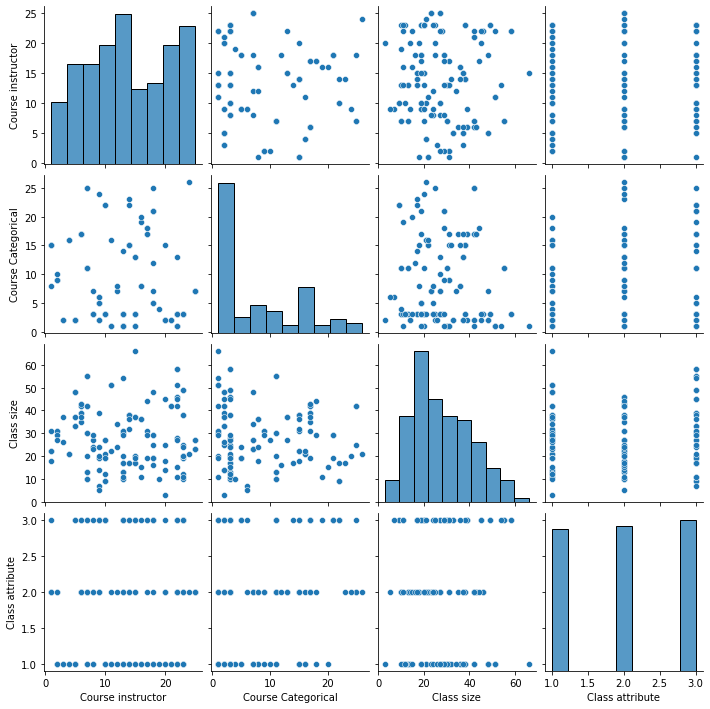

In [16]:
sns.pairplot(nd)

<AxesSubplot:>

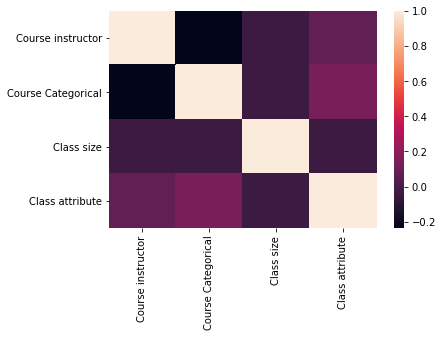

In [17]:
sns.heatmap(nd.corr())

In [62]:
a_train, a_test, b_train, b_test = train_test_split(a, b, test_size=0.25, random_state=1)
print(a_train.shape, a_test.shape, b_train.shape, b_test.shape)

(113, 3) (38, 3) (113,) (38,)


In [51]:
new = LogisticRegression()

In [20]:
new.fit(a_train, b_train)

C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


LogisticRegression()

In [21]:
new.score(a_train, b_train)

0.42857142857142855

In [22]:
print(cross_val_score(new, a_train, b_train, cv=3))

C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0.37142857 0.22857143 0.25714286]


In [25]:
sdg = SGDClassifier()

In [26]:
print(cross_val_score(sdg, a_train, b_train, cv=3))

[0.34285714 0.37142857 0.28571429]


C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [28]:
knc=KNeighborsClassifier()

In [30]:
print(cross_val_score(knc, a_train, b_train, cv=3))

[0.37142857 0.28571429 0.31428571]


C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


In [33]:
gnb=GaussianNB()

In [34]:
print(cross_val_score(gnb, a_train, b_train, cv=3))

[0.4        0.17142857 0.4       ]


C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [54]:
abc=AdaBoostClassifier()

In [55]:
print(cross_val_score(abc, a_train, b_train, cv=3))

C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


[0.47368421 0.44736842 0.35135135]


C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [52]:
rfc=RandomForestClassifier()

In [53]:
print(cross_val_score(rfc, a_train, b_train, cv=3))

C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[0.44736842 0.63157895 0.51351351]


In [45]:
vc=VotingClassifier(rfc)

In [47]:
print(cross_val_score(vc, a_train, b_train, cv=3))

[nan nan nan]


C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 265, in fit
    return super().fit(X, transformed_y, sample_weight)
  File "C:\Users\Avigyan\anaconda3\lib\site-packages\sklearn\ensemble\_voting.py", line 65, in fit
    names, clfs = self._validate_estimators()
  File "C:\Users\Av

In [63]:
rfc.fit(a_train, b_train)

RandomForestClassifier()

In [80]:
rfc.predict([d])

array([2], dtype=int64)

In [82]:
pic.dump(rfc,open('aqt.pkl','wb')) #wb= w binary